In [7]:
import pandas as pd

file_path = 'Marmara_THMOPEN_Hava_Kalitesi_2024 (1).csv'

try:
    # Dosyayı oku
    data = pd.read_csv(file_path)
    print(data)  # Tüm verileri yazdır
except FileNotFoundError:
    print("Dosya bulunamadı. Lütfen dosya yolunu kontrol edin veya dosyayı tekrar yükleyin.")

               Bölge         Şehir                  İstasyon  \
0    Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
1    Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
2    Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
3    Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
4    Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
..               ...           ...                       ...   
362  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
363  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
364  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
365  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
366  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   

                   Tarih  PM10 (µg/m³)  SO2 (µg/m³)  NO2 (µg/m³)  NOX (µg/m³)  \
0    2023-11-30 00:00:56         17.25         1.98        25.02        47.88   
1    2023-12-01 00:00:56         30.95         3.21        49.73     

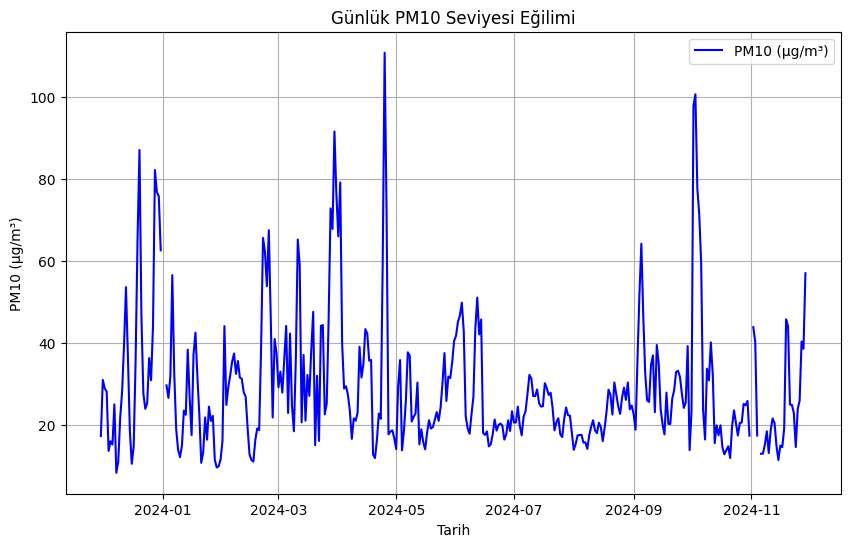

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Tarih sütununu datetime formatına çevir
data['Tarih'] = pd.to_datetime(data['Tarih'])

# PM10 seviyesinin zaman içindeki değişimi
plt.figure(figsize=(10, 6))
plt.plot(data['Tarih'], data['PM10 (µg/m³)'], label='PM10 (µg/m³)', color='blue')
plt.title('Günlük PM10 Seviyesi Eğilimi')
plt.xlabel('Tarih')
plt.ylabel('PM10 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

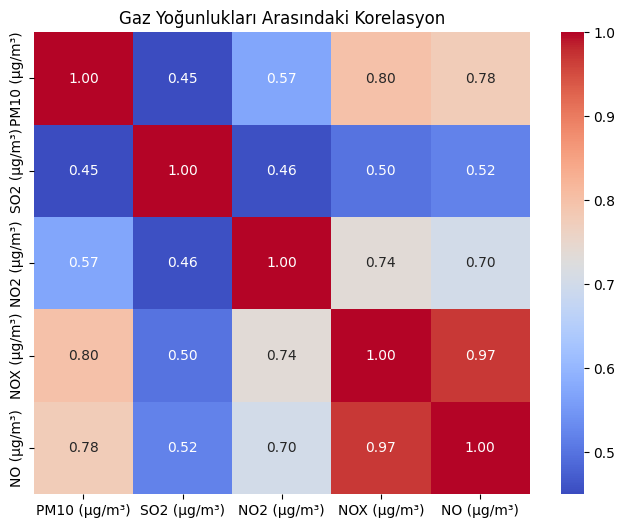

In [9]:
import seaborn as sns

# Korelasyon matrisini hesapla
correlation_matrix = data[['PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)', 'NOX (µg/m³)', 'NO (µg/m³)']].corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gaz Yoğunlukları Arasındaki Korelasyon')
plt.show()

In [10]:
# İstatistiksel özet
statistics = data[['PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)', 'NOX (µg/m³)', 'NO (µg/m³)']].describe()

# Tüm istatistikleri yazdır
print("Gazların İstatistiksel Özellikleri:")
print(statistics)

Gazların İstatistiksel Özellikleri:
       PM10 (µg/m³)  SO2 (µg/m³)  NO2 (µg/m³)  NOX (µg/m³)  NO (µg/m³)
count    362.000000   335.000000   362.000000   358.000000  359.000000
mean      29.118232     3.683045    34.900663   102.715475   35.570474
std       16.224290     2.060624    18.552046    81.777589   36.574418
min        8.310000     1.480000     5.810000    12.660000    2.630000
25%       18.632500     2.220000    22.105000    49.462500   11.160000
50%       24.335000     2.920000    29.730000    72.385000   21.860000
75%       35.167500     4.425000    45.527500   127.675000   45.940000
max      110.780000    12.310000   113.440000   485.470000  199.090000


Hava Kalitesi Durumu:
Hava Kalitesi
Orta    172
Kötü    122
İyi      73
Name: count, dtype: int64


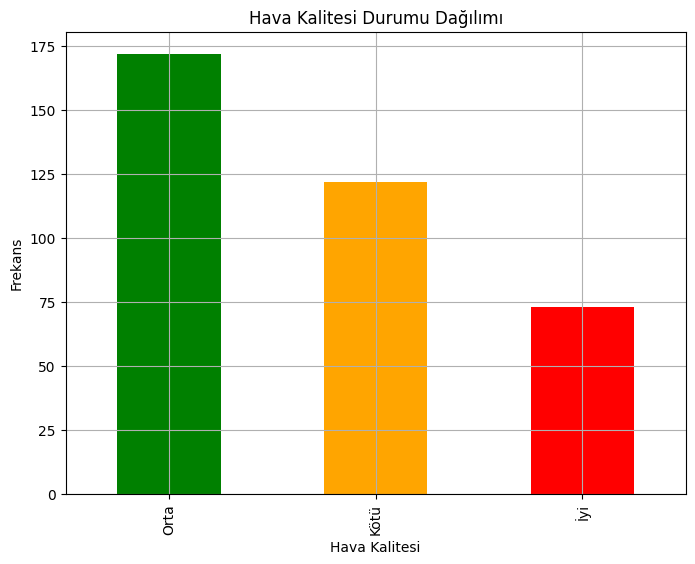

In [11]:
# PM10 ve NO2 seviyelerine göre hava kalitesi sınıflandırması
def classify_air_quality(row):
    if row['PM10 (µg/m³)'] > 50 or row['NO2 (µg/m³)'] > 40:
        return 'Kötü'
    elif row['PM10 (µg/m³)'] > 25 or row['NO2 (µg/m³)'] > 20:
        return 'Orta'
    else:
        return 'İyi'

data['Hava Kalitesi'] = data.apply(classify_air_quality, axis=1)

# Hava kalitesi durumu istatistikleri
quality_counts = data['Hava Kalitesi'].value_counts()
print("Hava Kalitesi Durumu:")
print(quality_counts)

# Hava kalitesi durumlarını görselleştir
plt.figure(figsize=(8, 6))
quality_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Hava Kalitesi Durumu Dağılımı')
plt.xlabel('Hava Kalitesi')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

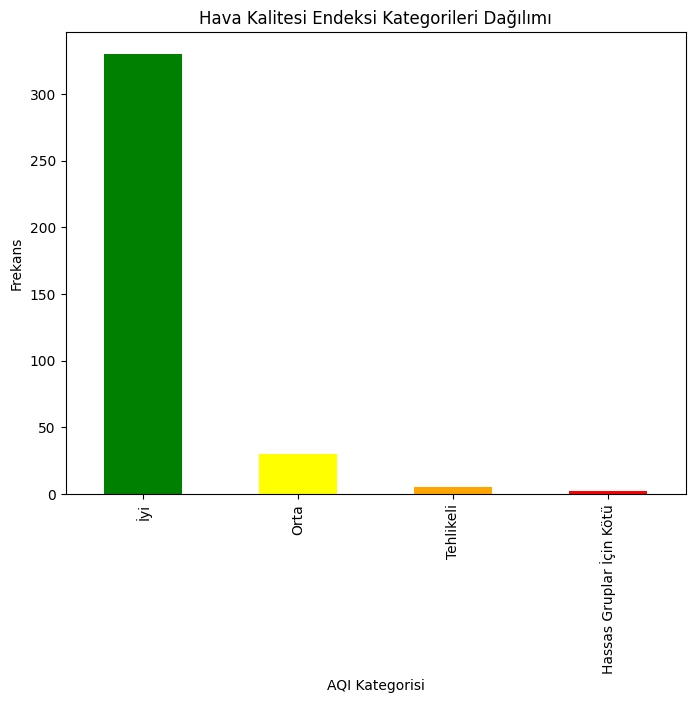

In [13]:
# Hava Kalitesi Endeksi (AQI) Sınıflandırması
def calculate_aqi(pm10):
    if pm10 <= 50:
        return 'İyi'
    elif pm10 <= 100:
        return 'Orta'
    elif pm10 <= 150:
        return 'Hassas Gruplar İçin Kötü'
    elif pm10 <= 200:
        return 'Kötü'
    elif pm10 <= 300:
        return 'Çok Kötü'
    else:
        return 'Tehlikeli'

# AQI Sınıflandırması ekle
data['AQI Kategorisi'] = data['PM10 (µg/m³)'].apply(calculate_aqi)

# Kategorilerin dağılımını görselleştir
import matplotlib.pyplot as plt

aqi_counts = data['AQI Kategorisi'].value_counts()
plt.figure(figsize=(8, 6))
aqi_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple', 'brown'])
plt.title('Hava Kalitesi Endeksi Kategorileri Dağılımı')
plt.xlabel('AQI Kategorisi')
plt.ylabel('Frekans')
plt.show()
# Saat bilgisi ekle
data['Saat'] = data['Tarih'].dt.hour

# PM10 seviyesinin saatlik ortalamaları
hourly_pm10 = data.groupby('Saat')['PM10 (µg/m³)'].mean()

# Saatlik kirlilik grafiği
plt.figure(figsize=(10, 6))
hourly_pm10.plot(kind='bar', color='blue')
plt.title('Saatlik Ortalama PM10 Seviyesi')
plt.xlabel('Saat')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()


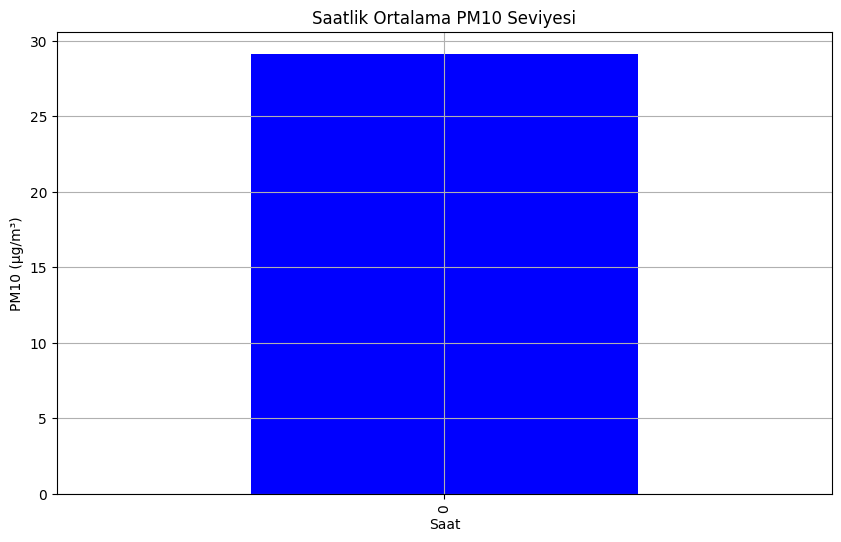

In [14]:
# Saat bilgisi ekle
data['Saat'] = data['Tarih'].dt.hour

# PM10 seviyesinin saatlik ortalamaları
hourly_pm10 = data.groupby('Saat')['PM10 (µg/m³)'].mean()

# Saatlik kirlilik grafiği
plt.figure(figsize=(10, 6))
hourly_pm10.plot(kind='bar', color='blue')
plt.title('Saatlik Ortalama PM10 Seviyesi')
plt.xlabel('Saat')
plt.ylabel('PM10 (µg/m³)')
plt.grid(True)
plt.show()


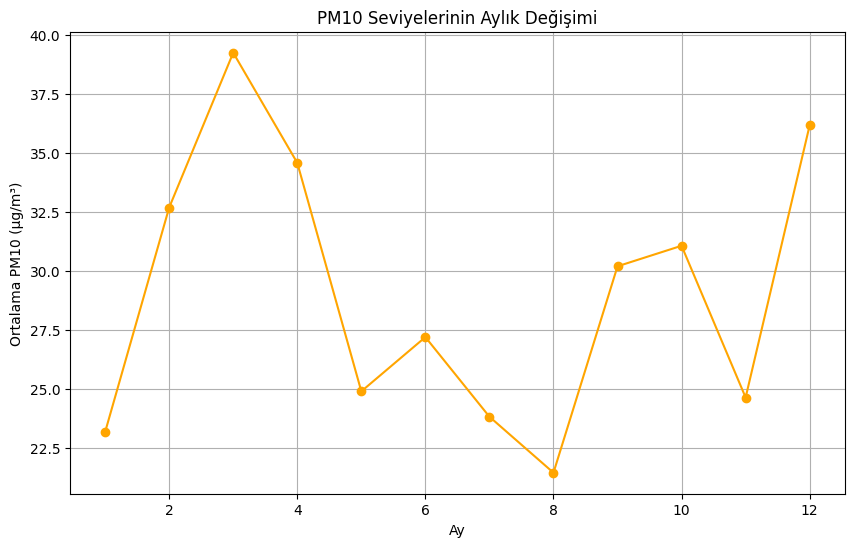

In [15]:
# Ay bilgisi ekle
data['Ay'] = data['Tarih'].dt.month

# PM10'un aylık ortalaması
monthly_pm10 = data.groupby('Ay')['PM10 (µg/m³)'].mean()

# Mevsimsel değişim grafiği
plt.figure(figsize=(10, 6))
monthly_pm10.plot(kind='line', marker='o', color='orange')
plt.title('PM10 Seviyelerinin Aylık Değişimi')
plt.xlabel('Ay')
plt.ylabel('Ortalama PM10 (µg/m³)')
plt.grid(True)
plt.show()


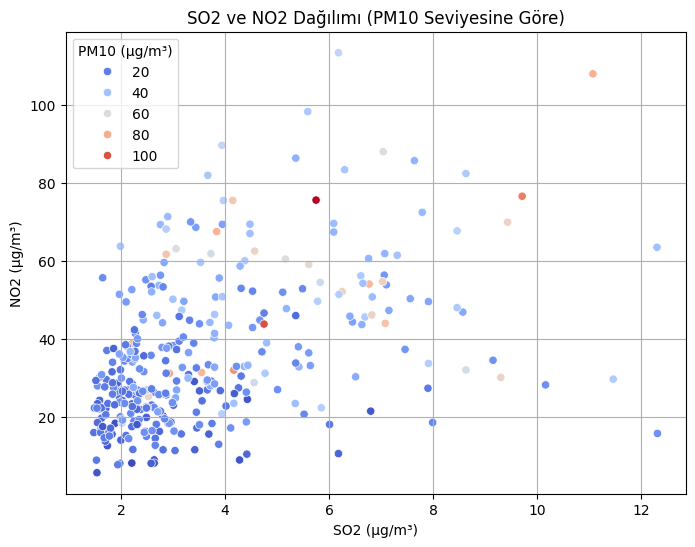

In [16]:
import seaborn as sns

# SO2 ve NO2 gazlarının dağılımını incele
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SO2 (µg/m³)', y='NO2 (µg/m³)', hue='PM10 (µg/m³)', palette='coolwarm')
plt.title('SO2 ve NO2 Dağılımı (PM10 Seviyesine Göre)')
plt.xlabel('SO2 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()


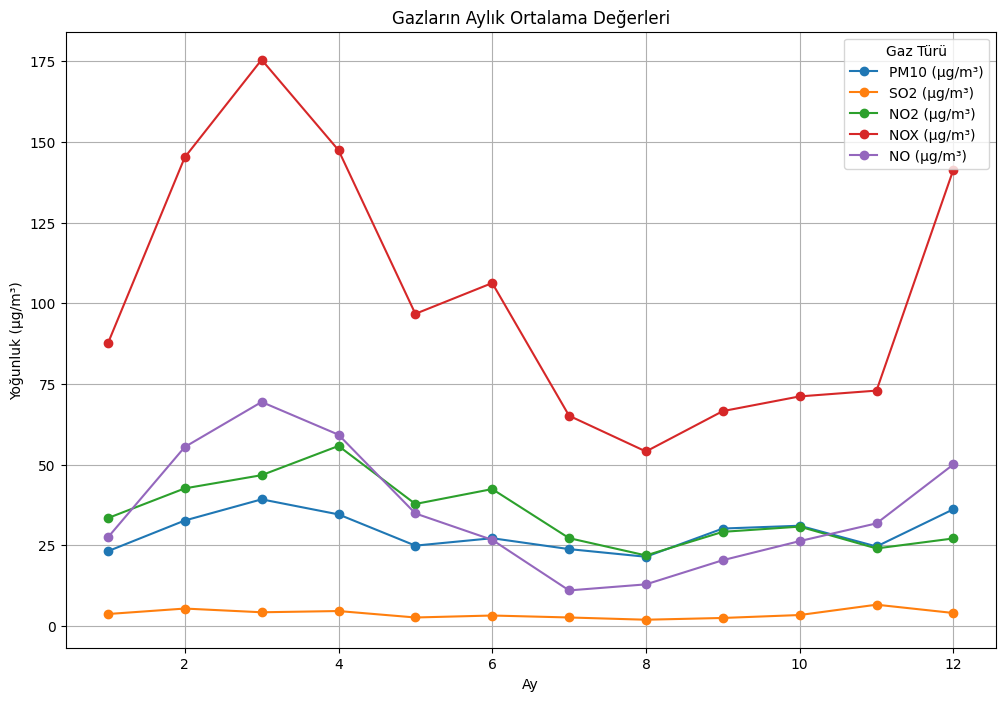

In [17]:
# Aylık ortalama gaz yoğunlukları
monthly_averages = data.groupby(data['Tarih'].dt.month)[['PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)', 'NOX (µg/m³)', 'NO (µg/m³)']].mean()

# Grafiği oluştur
monthly_averages.plot(figsize=(12, 8), marker='o')
plt.title('Gazların Aylık Ortalama Değerleri')
plt.xlabel('Ay')
plt.ylabel('Yoğunluk (µg/m³)')
plt.legend(title="Gaz Türü")
plt.grid(True)
plt.show()


En Yüksek PM10 Seviyeleri:
                  Tarih  PM10 (µg/m³)  SO2 (µg/m³)  NO2 (µg/m³)
147 2024-04-25 00:00:56        110.78         5.75        75.68
308 2024-10-03 00:00:56        100.64         4.75        43.90
307 2024-10-02 00:00:56         97.85          NaN        26.52
121 2024-03-30 00:00:56         91.55         9.71        76.67
20  2023-12-20 00:00:56         87.06         4.17        32.11
28  2023-12-28 00:00:56         82.16         2.93        31.28
124 2024-04-02 00:00:56         79.14        11.07       108.03
309 2024-10-04 00:00:56         77.72         3.84        67.62
29  2023-12-29 00:00:56         76.78         3.55        31.51
122 2024-03-31 00:00:56         76.30         6.77        54.16


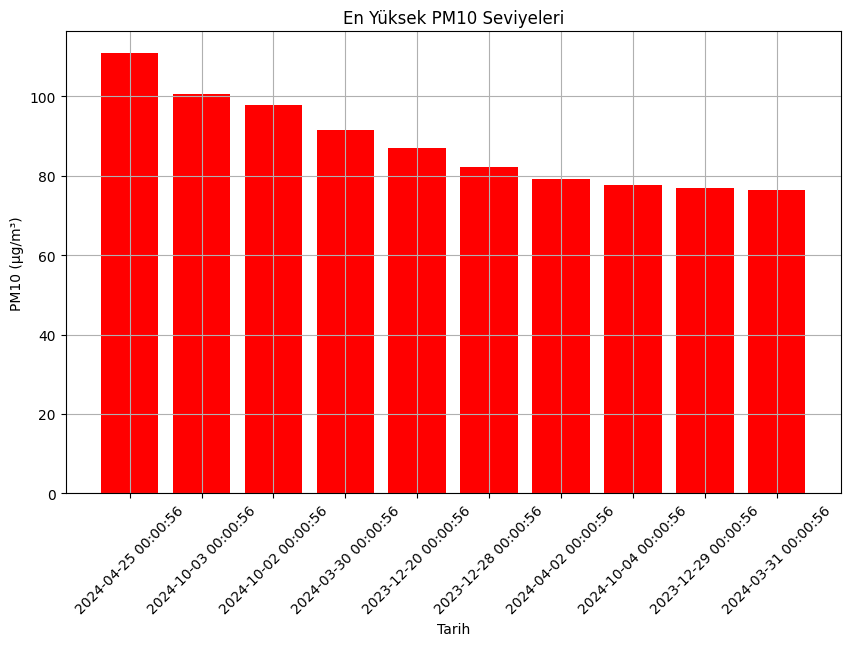

In [18]:
# En yüksek PM10 seviyeleri
top_pm10 = data.nlargest(10, 'PM10 (µg/m³)')

print("En Yüksek PM10 Seviyeleri:")
print(top_pm10[['Tarih', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)']])

# Grafiği oluştur
plt.figure(figsize=(10, 6))
plt.bar(top_pm10['Tarih'].astype(str), top_pm10['PM10 (µg/m³)'], color='red')
plt.title('En Yüksek PM10 Seviyeleri')
plt.xlabel('Tarih')
plt.ylabel('PM10 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
# En yüksek ve en düşük PM10 günleri
highest_pm10 = data[data['PM10 (µg/m³)'] == data['PM10 (µg/m³)'].max()]
lowest_pm10 = data[data['PM10 (µg/m³)'] == data['PM10 (µg/m³)'].min()]

print("En Yüksek PM10 Günü:")
print(highest_pm10)

print("\nEn Düşük PM10 Günü:")
print(lowest_pm10)


En Yüksek PM10 Günü:
               Bölge         Şehir                  İstasyon  \
147  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   

                  Tarih  PM10 (µg/m³)  SO2 (µg/m³)  NO2 (µg/m³)  NOX (µg/m³)  \
147 2024-04-25 00:00:56        110.78         5.75        75.68       304.14   

     NO (µg/m³) Hava Kalitesi   Yıl            AQI Kategorisi  Saat  Ay  
147      149.53          Kötü  2024  Hassas Gruplar İçin Kötü     0   4  

En Düşük PM10 Günü:
             Bölge         Şehir                  İstasyon  \
8  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   

                Tarih  PM10 (µg/m³)  SO2 (µg/m³)  NO2 (µg/m³)  NOX (µg/m³)  \
8 2023-12-08 00:00:56          8.31         2.21         8.28        34.14   

   NO (µg/m³) Hava Kalitesi   Yıl AQI Kategorisi  Saat  Ay  
8       13.65           İyi  2023            İyi     0  12  


Şehir Bazlı Ortalama Değerler:
              PM10 (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)
Şehir                                               
İstanbulOPEN     29.118232    34.900663     3.683045


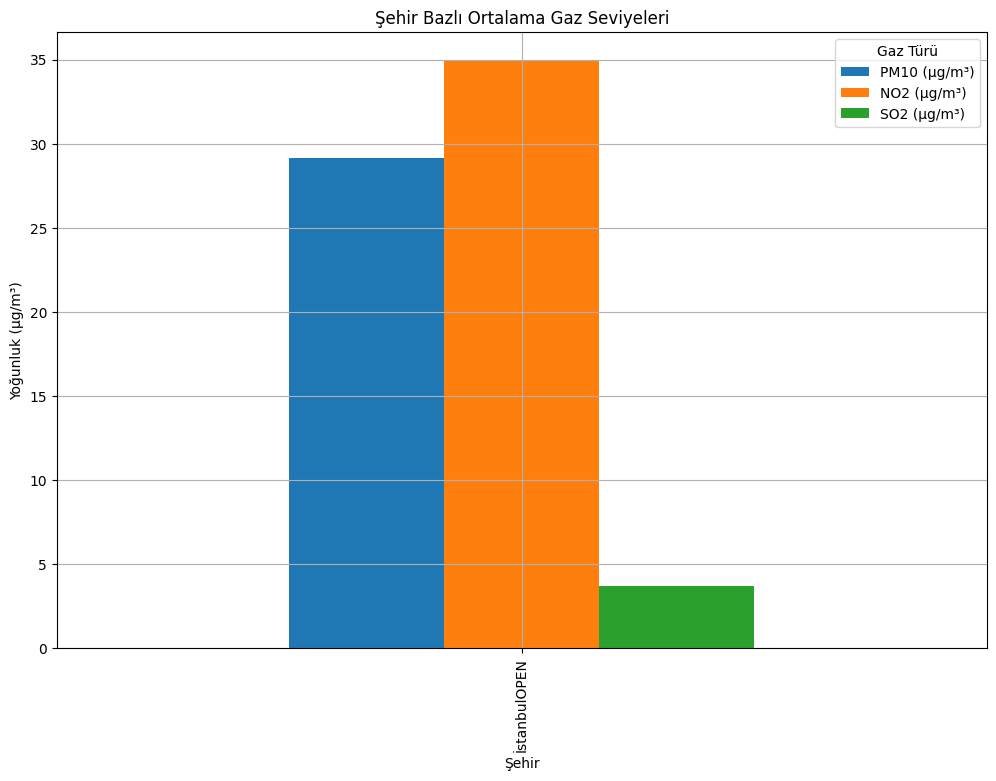

In [20]:
# Şehir bazlı ortalama PM10, NO2 ve SO2 seviyeleri
city_averages = data.groupby('Şehir')[['PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)']].mean()

print("Şehir Bazlı Ortalama Değerler:")
print(city_averages)

# Bar grafiği
city_averages.plot(kind='bar', figsize=(12, 8))
plt.title('Şehir Bazlı Ortalama Gaz Seviyeleri')
plt.xlabel('Şehir')
plt.ylabel('Yoğunluk (µg/m³)')
plt.legend(title="Gaz Türü")
plt.grid(True)
plt.show()


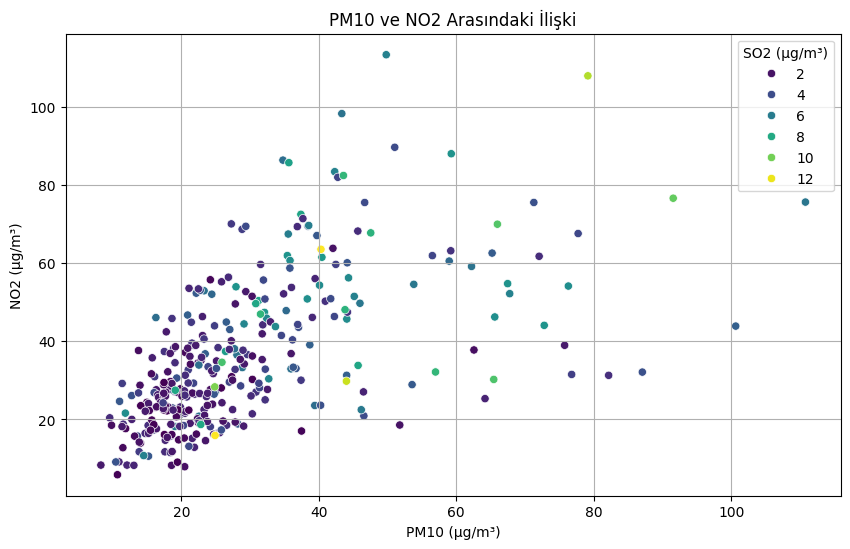

In [21]:
import seaborn as sns

# PM10 ve NO2 ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PM10 (µg/m³)', y='NO2 (µg/m³)', hue='SO2 (µg/m³)', palette='viridis')
plt.title('PM10 ve NO2 Arasındaki İlişki')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid(True)
plt.show()

In [22]:
# PM10 için aykırı değerlerin tespiti (IQR yöntemi)
Q1 = data['PM10 (µg/m³)'].quantile(0.25)
Q3 = data['PM10 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['PM10 (µg/m³)'] < Q1 - 1.5 * IQR) | (data['PM10 (µg/m³)'] > Q3 + 1.5 * IQR)]

print("Aykırı Değerler (PM10):")
print(outliers)


Aykırı Değerler (PM10):
               Bölge         Şehir                  İstasyon  \
19   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
20   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
28   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
29   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
30   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
31   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
84   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
85   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
87   Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
102  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
119  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
120  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
121  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
122  Marmara THMOPEN  İstanbulOPEN  İstanbul - Kandilli-MTHM   
123  Marmara THM

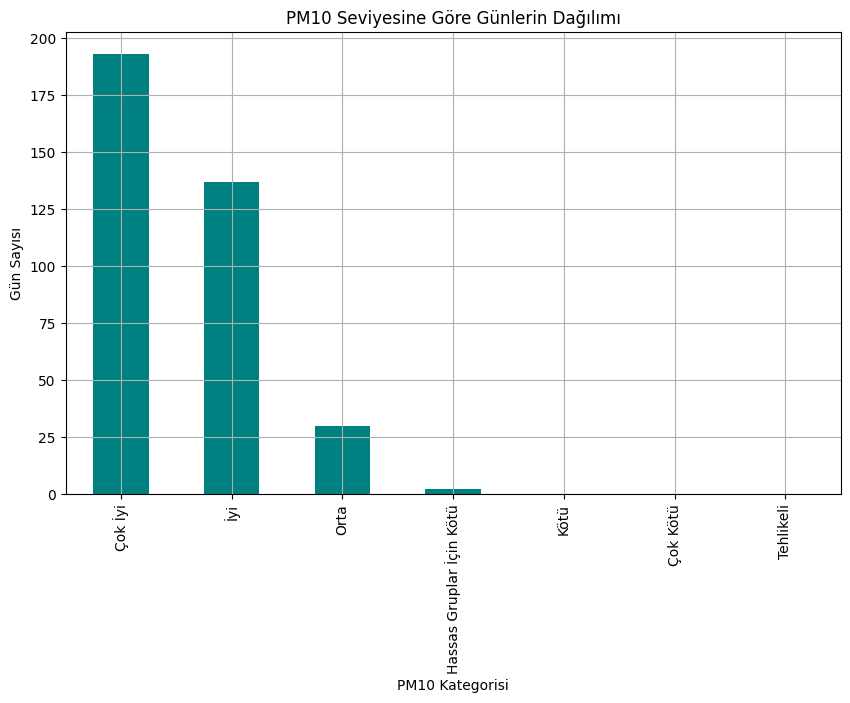

In [24]:
# PM10 seviyesine göre günleri kategorilere ayır
bins = [0, 25, 50, 100, 150, 200, 300, float('inf')]
labels = ['Çok İyi', 'İyi', 'Orta', 'Hassas Gruplar İçin Kötü', 'Kötü', 'Çok Kötü', 'Tehlikeli']
data['PM10 Kategorisi'] = pd.cut(data['PM10 (µg/m³)'], bins=bins, labels=labels)

# Kategorilerin dağılımını görselleştir
category_counts = data['PM10 Kategorisi'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='teal')
plt.title('PM10 Seviyesine Göre Günlerin Dağılımı')
plt.xlabel('PM10 Kategorisi')
plt.ylabel('Gün Sayısı')
plt.grid(True)
plt.show()


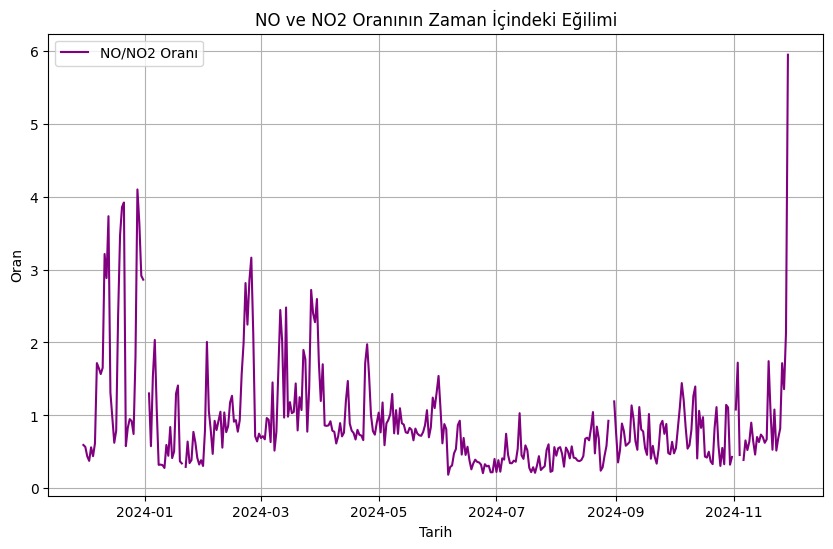

In [25]:
# NO/NO2 oranı
data['NO to NO2 Ratio'] = data['NO (µg/m³)'] / data['NO2 (µg/m³)']

# Zaman içinde NO/NO2 oranı
plt.figure(figsize=(10, 6))
plt.plot(data['Tarih'], data['NO to NO2 Ratio'], label='NO/NO2 Oranı', color='purple')
plt.title('NO ve NO2 Oranının Zaman İçindeki Eğilimi')
plt.xlabel('Tarih')
plt.ylabel('Oran')
plt.grid(True)
plt.legend()
plt.show()

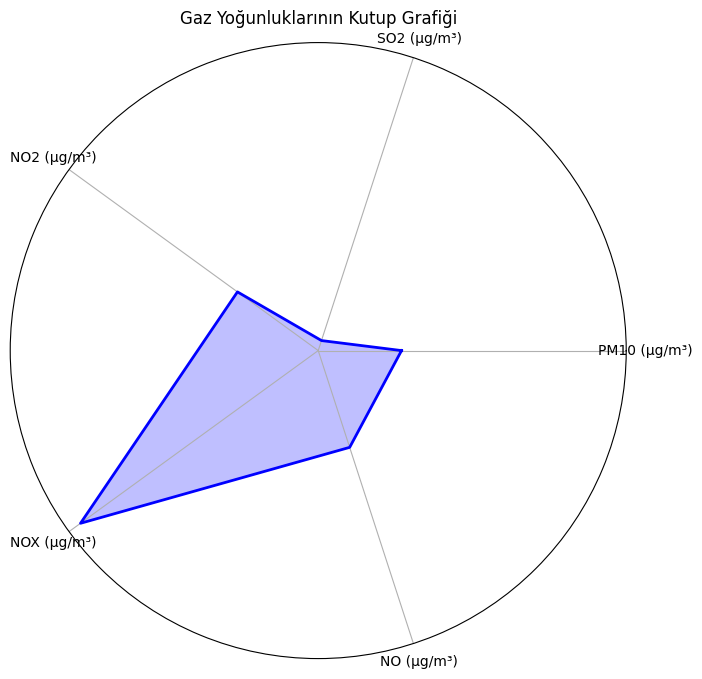

In [26]:
import numpy as np

# Gaz yoğunluklarını normalize et
normalized_gases = data[['PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)', 'NOX (µg/m³)', 'NO (µg/m³)']].mean()
categories = normalized_gases.index
values = normalized_gases.values

# Kutup grafiği
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Gaz Yoğunluklarının Kutup Grafiği')
plt.show()